In [257]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import time

In [264]:
def distance_matrix(data, eps=1e-10):
    x1 = data.unsqueeze(1).repeat(1, data.shape[0], 1)
    x2 = data.unsqueeze(0)
#     print("x1:",x1.shape)
#     print("x2:",x2.shape)
    dist = (x1 - x2)
    dist = dist.pow(2)
    dist = dist.sum(2)

    dist = (dist+eps).sqrt()
    dist = torch.triu(dist,diagonal=1)
#     dist = (dist).sqrt()
    
   
    dist = dist.view(1, -1)
#     print(dist)
#     print(dist.shape)
    return dist / dist.sum()

In [259]:
net = nn.Linear(2,2)
optimizer = optim.Adam(net.parameters(), lr=1e-3)

In [270]:
test = torch.Tensor([[2,11],[3,13],[5,17],[7,19]])
# test = torch.randn(64,2)
# test = torch.Tensor([[0,0],[1,0],[1,1],[0,1]])
i_D = distance_matrix(test) 
plt.ion()
plt.figure()
for i in range(1000):
    optimizer.zero_grad()
    o = net(test)
    o_D = distance_matrix(o)
    loss = F.l1_loss(o_D,i_D)
    # clear gradients for next train
    loss.backward()
#     if i % 10 == 0:
#         plt.plot(i,loss.item())
#         plt.draw()
#         time.sleep(0.01)
    optimizer.step()
out = net(test)
loss = F.l1_loss(distance_matrix(out),i_D)
print(loss)

tensor(3.0501e-07, grad_fn=<L1LossBackward>)


<Figure size 432x288 with 0 Axes>

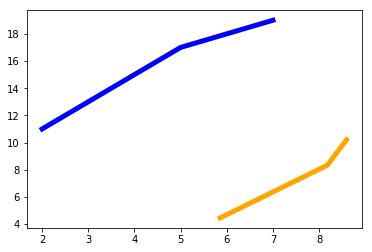

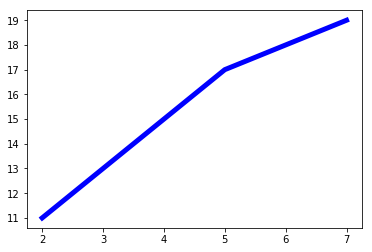

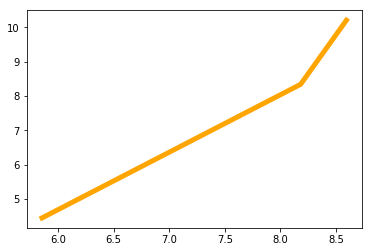

In [273]:
plt.figure()
plt.plot(test.data[:,0].numpy(),test.data[:,1].numpy(),color='blue',lw=5)
plt.plot(out.data[:,0].numpy(),out.data[:,1].numpy(),color='orange',lw=5)
# print(test)
# print(i_D.view(test.shape[0],test.shape[0]))
plt.figure()
plt.plot(test.data[:,0].numpy(),test.data[:,1].numpy(),color='blue',lw=5)
plt.figure()
plt.plot(out.data[:,0].numpy(),out.data[:,1].numpy(),color='orange',lw=5)
# print(out)
# print(distance_matrix(out).view(test.shape[0],test.shape[0]))

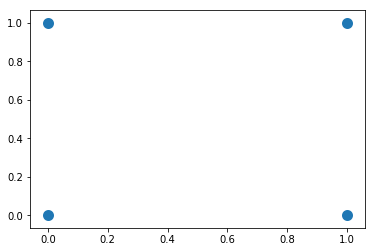

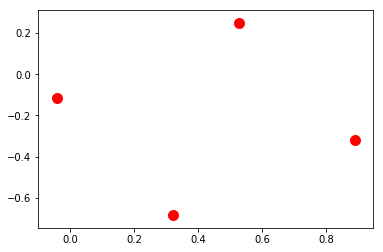

In [268]:
plt.figure()
plt.scatter(test.data[:,0].numpy(),test.data[:,1].numpy(),lw=5)
plt.figure()
plt.scatter(out.data[:,0].numpy(),out.data[:,1].numpy(),color='red',lw=5)